In [2]:
import time
import requests
import json
import pandas as pd
import ast
import numpy as np
from datetime import datetime
import re
import sqlite3
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
df = pd.read_csv('movies_final.csv')

In [4]:
df

,Unnamed: 0,Title,Director,Release Date,Revenue,Writers,Rotten Tomatoes Review,Number of RT Reviews,Release Year,Genres,Average IMDB Rating,Number of IMDB Votes,Popularity,Average TMDB Rating,Number of TMDB Votes,Release Month,director0,director0.1,director0.2,director_0
0,0,Chicken Run,"['Peter Lord', 'Nick Park']","Jun 21, 2000","$106,604,314","['Jack Rosenthal', 'Karey Kirkpatrick']",97%,171.0,2000.0,"Adventure,Animation,Comedy",7.0,162266.0,13.973,6.6,2435.0,6.0,"['Peter Lord', 'Nick Park']","['Peter Lord', 'Nick Park']","['Peter Lord', 'Nick Park']","['Peter Lord', 'Nick Park']"
1,3,The Taste of Others,['Agnès Jaoui'],"Jan 1, 2000",\n\n 112 minute...,"['Jean-Pierre Bacri', 'Agnès Jaoui']",NaN,NaN,NaN,NaN,NaN,NaN,4.855,6.7,97.0,3.0,['Agnès Jaoui'],['Agnès Jaoui'],['Agnès Jaoui'],['Agnès Jaoui']
2,4,The Life and Times of Hank Greenberg,['Aviva Kempner'],"Jan 12, 2000",\n\n 89 minutes...,['Aviva Kempner'],97%,65.0,2000.0,NaN,NaN,NaN,0.600,6.0,6.0,1.0,['Aviva Kempner'],['Aviva Kempner'],['Aviva Kempner'],['Aviva Kempner']
3,5,Yi Yi,['Edward Yang'],"Oct 6, 2000",\n\n 173 minute...,['Edward Yang'],96%,83.0,2000.0,"Drama,Romance",8.1,16786.0,6.727,8.0,156.0,9.0,['Edward Yang'],['Edward Yang'],['Edward Yang'],['Edward Yang']
4,10804,You Can Count On Me,['Kenneth Lonergan'],"Nov 10, 2000","$8,409,329",['Kenneth Lonergan'],95%,103.0,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['Kenneth Lonergan'],['Kenneth Lonergan'],['Kenneth Lonergan'],['Kenneth Lonergan']
5,26,Memento,['Christopher Nolan'],"Sep 5, 2000","$23,844,220",['Christopher Nolan'],92%,172.0,2000.0,"Mystery,Thriller",8.5,1019199.0,13.114,8.2,7509.0,10.0,['Christopher Nolan'],['Christopher Nolan'],['Christopher Nolan'],['Christopher Nolan']
6,46,Best in Show,['Christopher Guest'],"Sep 29, 2000","$16,574,225","['Christopher Guest', 'Eugene Levy']",94%,112.0,2000.0,Comedy,7.5,50942.0,7.376,7.1,248.0,9.0,['Christopher Guest'],['Christopher Guest'],['Christopher Guest'],['Christopher Guest']
7,69,Croupier,['Mike Hodges'],"Apr 21, 2000",\n\n 91 minutes...,['Paul Mayersberg'],96%,57.0,2000.0,NaN,NaN,NaN,5.800,6.9,109.0,6.0,['Mike Hodges'],['Mike Hodges'],['Mike Hodges'],['Mike Hodges']
8,74,Dark Days,['Marc Singer'],"Sep 25, 2001",\n \n ...,[],94%,68.0,2000.0,Documentary,7.8,6028.0,2.085,7.6,48.0,8.0,['Marc Singer'],['Marc Singer'],['Marc Singer'],['Marc Singer']
9,84,Not One Less,['Yimou Zhang'],"Feb 18, 2000",\n\n 106 minute...,"['Xiangsheng Shi', 'Xiangsheng Shi']",95%,44.0,2000.0,NaN,NaN,NaN,2.600,7.6,61.0,9.0,['Yimou Zhang'],['Yimou Zhang'],['Yimou Zhang'],['Yimou Zhang']


In [5]:
df['Rotten Tomatoes Review'] = df['Rotten Tomatoes Review'].astype(str).map(lambda x: x.split('%')[0])

In [6]:
df['Rotten Tomatoes Review'] = df['Rotten Tomatoes Review'].astype(float)

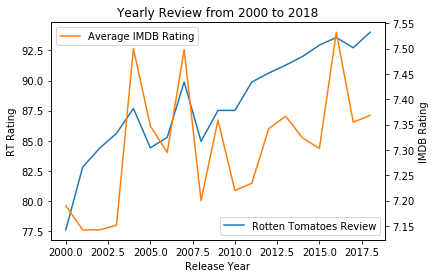

In [7]:
RT_Reviews = df.groupby('Release Year')['Rotten Tomatoes Review'].mean().plot()
RT_Count = df.groupby('Release Year')['Average IMDB Rating'].mean().plot(secondary_y=True)
RT_Reviews.set_title('Yearly Review from 2000 to 2018')
RT_Reviews.set_ylabel('RT Rating')
RT_Count.set_ylabel('IMDB Rating')
RT_Reviews.legend(loc=4)
RT_Count.legend(loc=2)


Text(0, 0.5, 'TMDB Popularity Ratings')

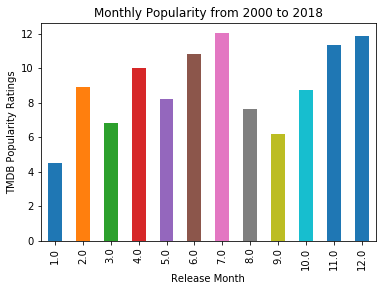

In [11]:
# To get the average user ratings for movies released during the month 
monthly_popularity = df.groupby('Release Month')['Popularity'].mean().plot(kind = 'bar')
monthly_popularity.set_title('Monthly Popularity from 2000 to 2018')
monthly_popularity.set_ylabel('TMDB Popularity Ratings')